# Importing Data & Libraries

In [1]:
#importing necessary librarires into the notebook and using them when required. Note we can import libraries now or later!
import pandas as pd
import numpy as np
#for visualization
import matplotlib.pyplot as plt
#for visualization
import seaborn as sns
#for getting visualization for matplot in jupyter notebook
%matplotlib inline
#to supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset into a dataframe called df
df = pd.read_csv('/Users/raghunandanms/Documents/Personal/DS/0 Internship/Machine Learning Internship MIP-ML-12/Salary Prediction/Salary Prediction of Data Professions.csv', encoding = 'ascii')

# Data Exploration and Cleaning

In [3]:
#checking the 5 rows from the top using head
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [4]:
#to see the description of columns
df.describe

<bound method NDFrame.describe of      FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE     DESIGNATION  \
0        TOMASA       ARMEN   F   5-18-2014   01-07-2016         Analyst   
1         ANNIE         NaN   F         NaN   01-07-2016       Associate   
2         OLIVE        ANCY   F   7-28-2014   01-07-2016         Analyst   
3        CHERRY     AQUILAR   F  04-03-2013   01-07-2016         Analyst   
4          LEON  ABOULAHOUD   M  11-20-2014   01-07-2016         Analyst   
...         ...         ...  ..         ...          ...             ...   
2634  KATHERINE      ALSDON   F   6-28-2011   01-07-2016  Senior Manager   
2635     LOUISE     ALTARAS   F   1-14-2014   01-07-2016         Analyst   
2636      RENEE      ALVINO   F   1-23-2014   01-07-2016         Analyst   
2637       TERI   ANASTASIO   F   3-17-2014   01-07-2016         Analyst   
2638    GREGORY      ABARCA   M   9-18-2014   01-07-2016         Analyst   

       AGE  SALARY        UNIT  LEAVES USED  LEAVES R

In [5]:
#to see the types of columns say - int or string (object)
df.dtypes

FIRST NAME           object
LAST NAME            object
SEX                  object
DOJ                  object
CURRENT DATE         object
DESIGNATION          object
AGE                 float64
SALARY                int64
UNIT                 object
LEAVES USED         float64
LEAVES REMAINING    float64
RATINGS             float64
PAST EXP              int64
dtype: object

In [6]:
#to check missing values
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [7]:
#to check the percentage of missing values
df.isnull().mean()*100

FIRST NAME          0.000000
LAST NAME           0.075786
SEX                 0.000000
DOJ                 0.037893
CURRENT DATE        0.000000
DESIGNATION         0.000000
AGE                 0.113679
SALARY              0.000000
UNIT                0.000000
LEAVES USED         0.113679
LEAVES REMAINING    0.075786
RATINGS             0.075786
PAST EXP            0.000000
dtype: float64

In [8]:
#to handle the missing values
print(f'Before dropping null values: {df.shape}')
df=df.dropna(axis=0)
print(f'After dropping null values: {df.shape}')

Before dropping null values: (2639, 13)
After dropping null values: (2631, 13)


In [9]:
#checking for null values
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

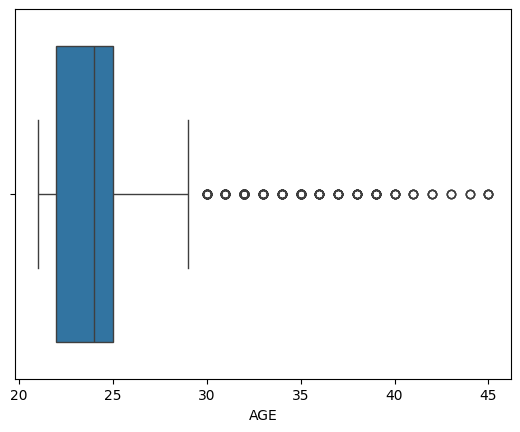

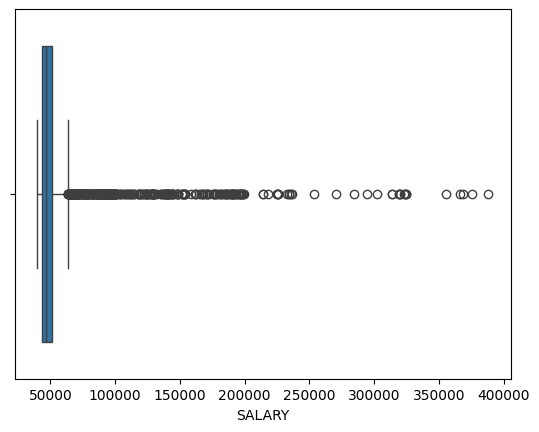

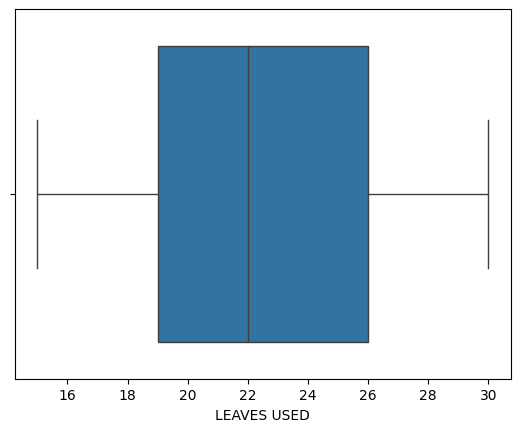

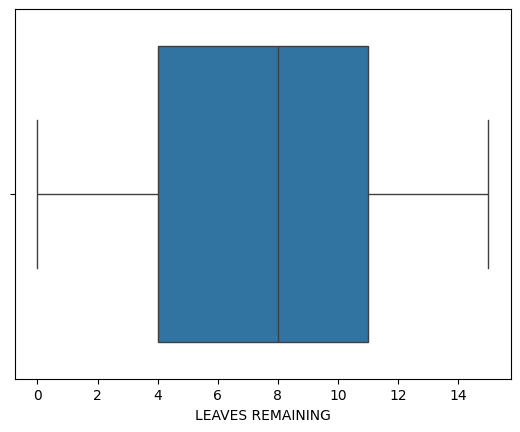

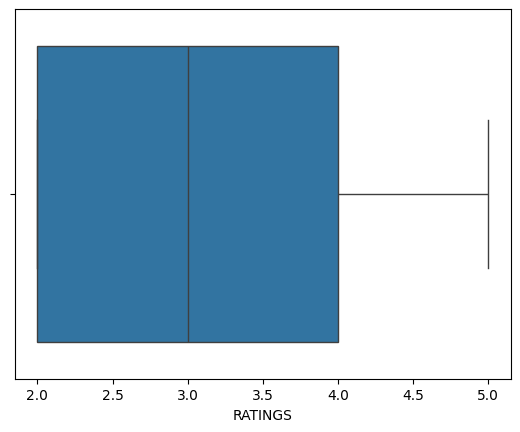

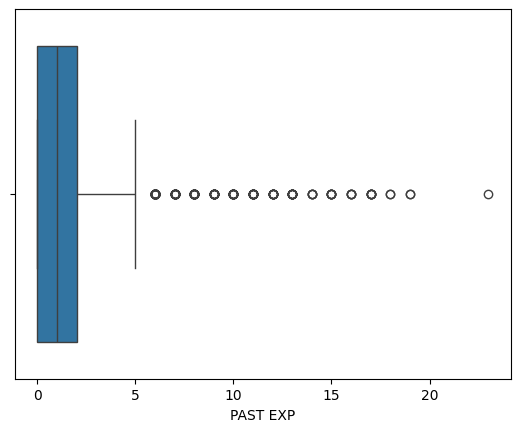

In [10]:
#Checking outliers
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [11]:
# To check the names of the columns
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [12]:
num_df = ['AGE', 'SALARY', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP']

In [13]:
outliers=[]
def detect_outliers_iqr(df):
    df = sorted(df)
    q1=np.percentile(df, 25)
    q3=np.percentile(df, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3 +(1.5*IQR)
    for i in df:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

In [14]:
sample_outliers = detect_outliers_iqr(df['RATINGS'])
print("Sample outliers for the Age column is: ", sample_outliers)

Sample outliers for the Age column is:  []


# Feature Engineering

In [15]:
df = df.drop(columns=['FIRST NAME', 'LAST NAME'])
df

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
2634,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [16]:
df = df.drop(columns=['CURRENT DATE'])
df

,SEX,DOJ,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,F,7-28-2014,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,M,09-02-2013,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,F,6-29-2014,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
2634,F,6-28-2011,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,F,1-14-2014,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,F,1-23-2014,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,F,3-17-2014,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [17]:
#Converting the object into datetime format
df['DOJ'] = pd.to_datetime(df['DOJ'])

In [18]:
df.dtypes

SEX                         object
DOJ                 datetime64[ns]
DESIGNATION                 object
AGE                        float64
SALARY                       int64
UNIT                        object
LEAVES USED                float64
LEAVES REMAINING           float64
RATINGS                    float64
PAST EXP                     int64
dtype: object

In [19]:
df['Year']=df['DOJ'].dt.year
df['Month']=df['DOJ'].dt.month
df['Day']=df['DOJ'].dt.day

In [20]:
df

,SEX,DOJ,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Year,Month,Day
0,F,2014-05-18,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2014,5,18
2,F,2014-07-28,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2014,7,28
3,F,2013-04-03,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2013,4,3
6,M,2013-09-02,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2013,9,2
8,F,2014-06-29,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,2014,6,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,F,2011-06-28,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,2011,6,28
2635,F,2014-01-14,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,2014,1,14
2636,F,2014-01-23,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,2014,1,23
2637,F,2014-03-17,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,2014,3,17


In [21]:
df.dtypes

SEX                         object
DOJ                 datetime64[ns]
DESIGNATION                 object
AGE                        float64
SALARY                       int64
UNIT                        object
LEAVES USED                float64
LEAVES REMAINING           float64
RATINGS                    float64
PAST EXP                     int64
Year                         int32
Month                        int32
Day                          int32
dtype: object

In [22]:
df1 = df.drop(columns=['DOJ'])
df1

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Year,Month,Day
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2014,5,18
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2014,7,28
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2013,4,3
6,M,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2013,9,2
8,F,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,2014,6,29
...,...,...,...,...,...,...,...,...,...,...,...,...
2634,F,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,2011,6,28
2635,F,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,2014,1,14
2636,F,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,2014,1,23
2637,F,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,2014,3,17


In [23]:
df1.reset_index(drop=True)

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Year,Month,Day
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2014,5,18
1,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2014,7,28
2,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2013,4,3
3,M,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2013,9,2
4,F,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,2014,6,29
...,...,...,...,...,...,...,...,...,...,...,...,...
2626,F,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,2011,6,28
2627,F,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,2014,1,14
2628,F,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,2014,1,23
2629,F,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,2014,3,17


# Encoding

In [24]:
# To encode the string to numbers we can use encoders such as one-hot encoding or label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1['GENDER_CLASS']=le.fit_transform(df1['SEX'])

In [25]:
df1

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Year,Month,Day,GENDER_CLASS
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,2014,5,18,0
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,2014,7,28,0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2013,4,3,0
6,M,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2013,9,2,1
8,F,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,2014,6,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,F,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10,2011,6,28,0
2635,F,Analyst,23.0,45758,IT,17.0,13.0,2.0,0,2014,1,14,0
2636,F,Analyst,21.0,47315,Web,29.0,1.0,5.0,0,2014,1,23,0
2637,F,Analyst,24.0,45172,Web,23.0,7.0,3.0,1,2014,3,17,0


In [26]:
le = LabelEncoder()
df1['UNIT']=le.fit_transform(df1['UNIT'])

In [27]:
le=LabelEncoder()
df1['DESIGNATION']=le.fit_transform(df1['DESIGNATION'])

In [28]:
df1

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Year,Month,Day,GENDER_CLASS
0,F,0,21.0,44570,0,24.0,6.0,2.0,0,2014,5,18,0
2,F,0,21.0,40955,0,23.0,7.0,3.0,0,2014,7,28,0
3,F,0,22.0,45550,1,22.0,8.0,3.0,0,2013,4,3,0
6,M,0,22.0,40339,3,19.0,11.0,5.0,0,2013,9,2,1
8,F,4,28.0,63478,4,20.0,10.0,3.0,1,2014,6,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,F,5,36.0,185977,2,15.0,15.0,5.0,10,2011,6,28,0
2635,F,0,23.0,45758,1,17.0,13.0,2.0,0,2014,1,14,0
2636,F,0,21.0,47315,5,29.0,1.0,5.0,0,2014,1,23,0
2637,F,0,24.0,45172,5,23.0,7.0,3.0,1,2014,3,17,0


In [29]:
df1=df1.drop(columns='SEX')

In [30]:
df1

,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,Year,Month,Day,GENDER_CLASS
0,0,21.0,44570,0,24.0,6.0,2.0,0,2014,5,18,0
2,0,21.0,40955,0,23.0,7.0,3.0,0,2014,7,28,0
3,0,22.0,45550,1,22.0,8.0,3.0,0,2013,4,3,0
6,0,22.0,40339,3,19.0,11.0,5.0,0,2013,9,2,1
8,4,28.0,63478,4,20.0,10.0,3.0,1,2014,6,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2634,5,36.0,185977,2,15.0,15.0,5.0,10,2011,6,28,0
2635,0,23.0,45758,1,17.0,13.0,2.0,0,2014,1,14,0
2636,0,21.0,47315,5,29.0,1.0,5.0,0,2014,1,23,0
2637,0,24.0,45172,5,23.0,7.0,3.0,1,2014,3,17,0


# Exploratory Data Analysis

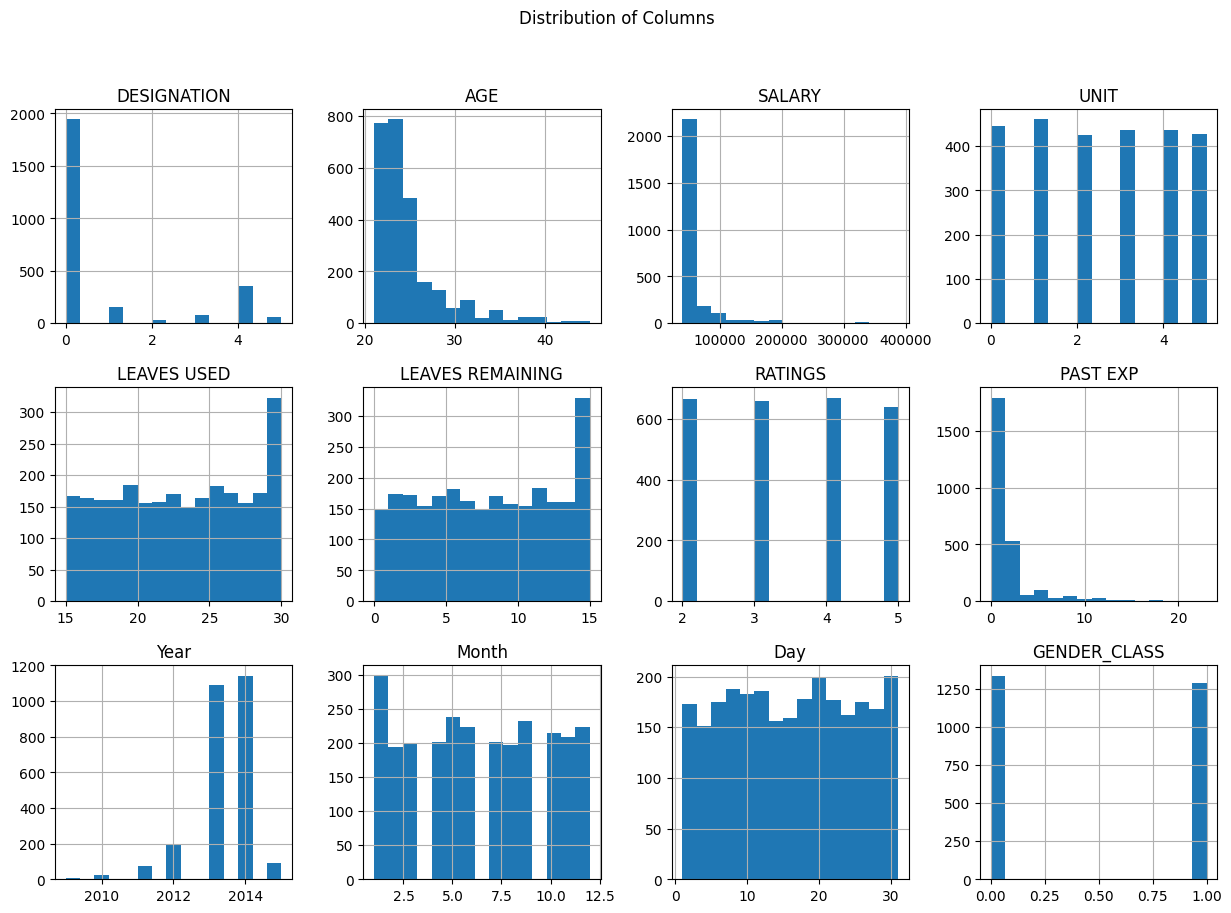

In [31]:
# To see the distribution of columns

df1.hist(bins=15, figsize=(15,10), layout=(3,4))
plt.suptitle("Distribution of Columns")
plt.show()

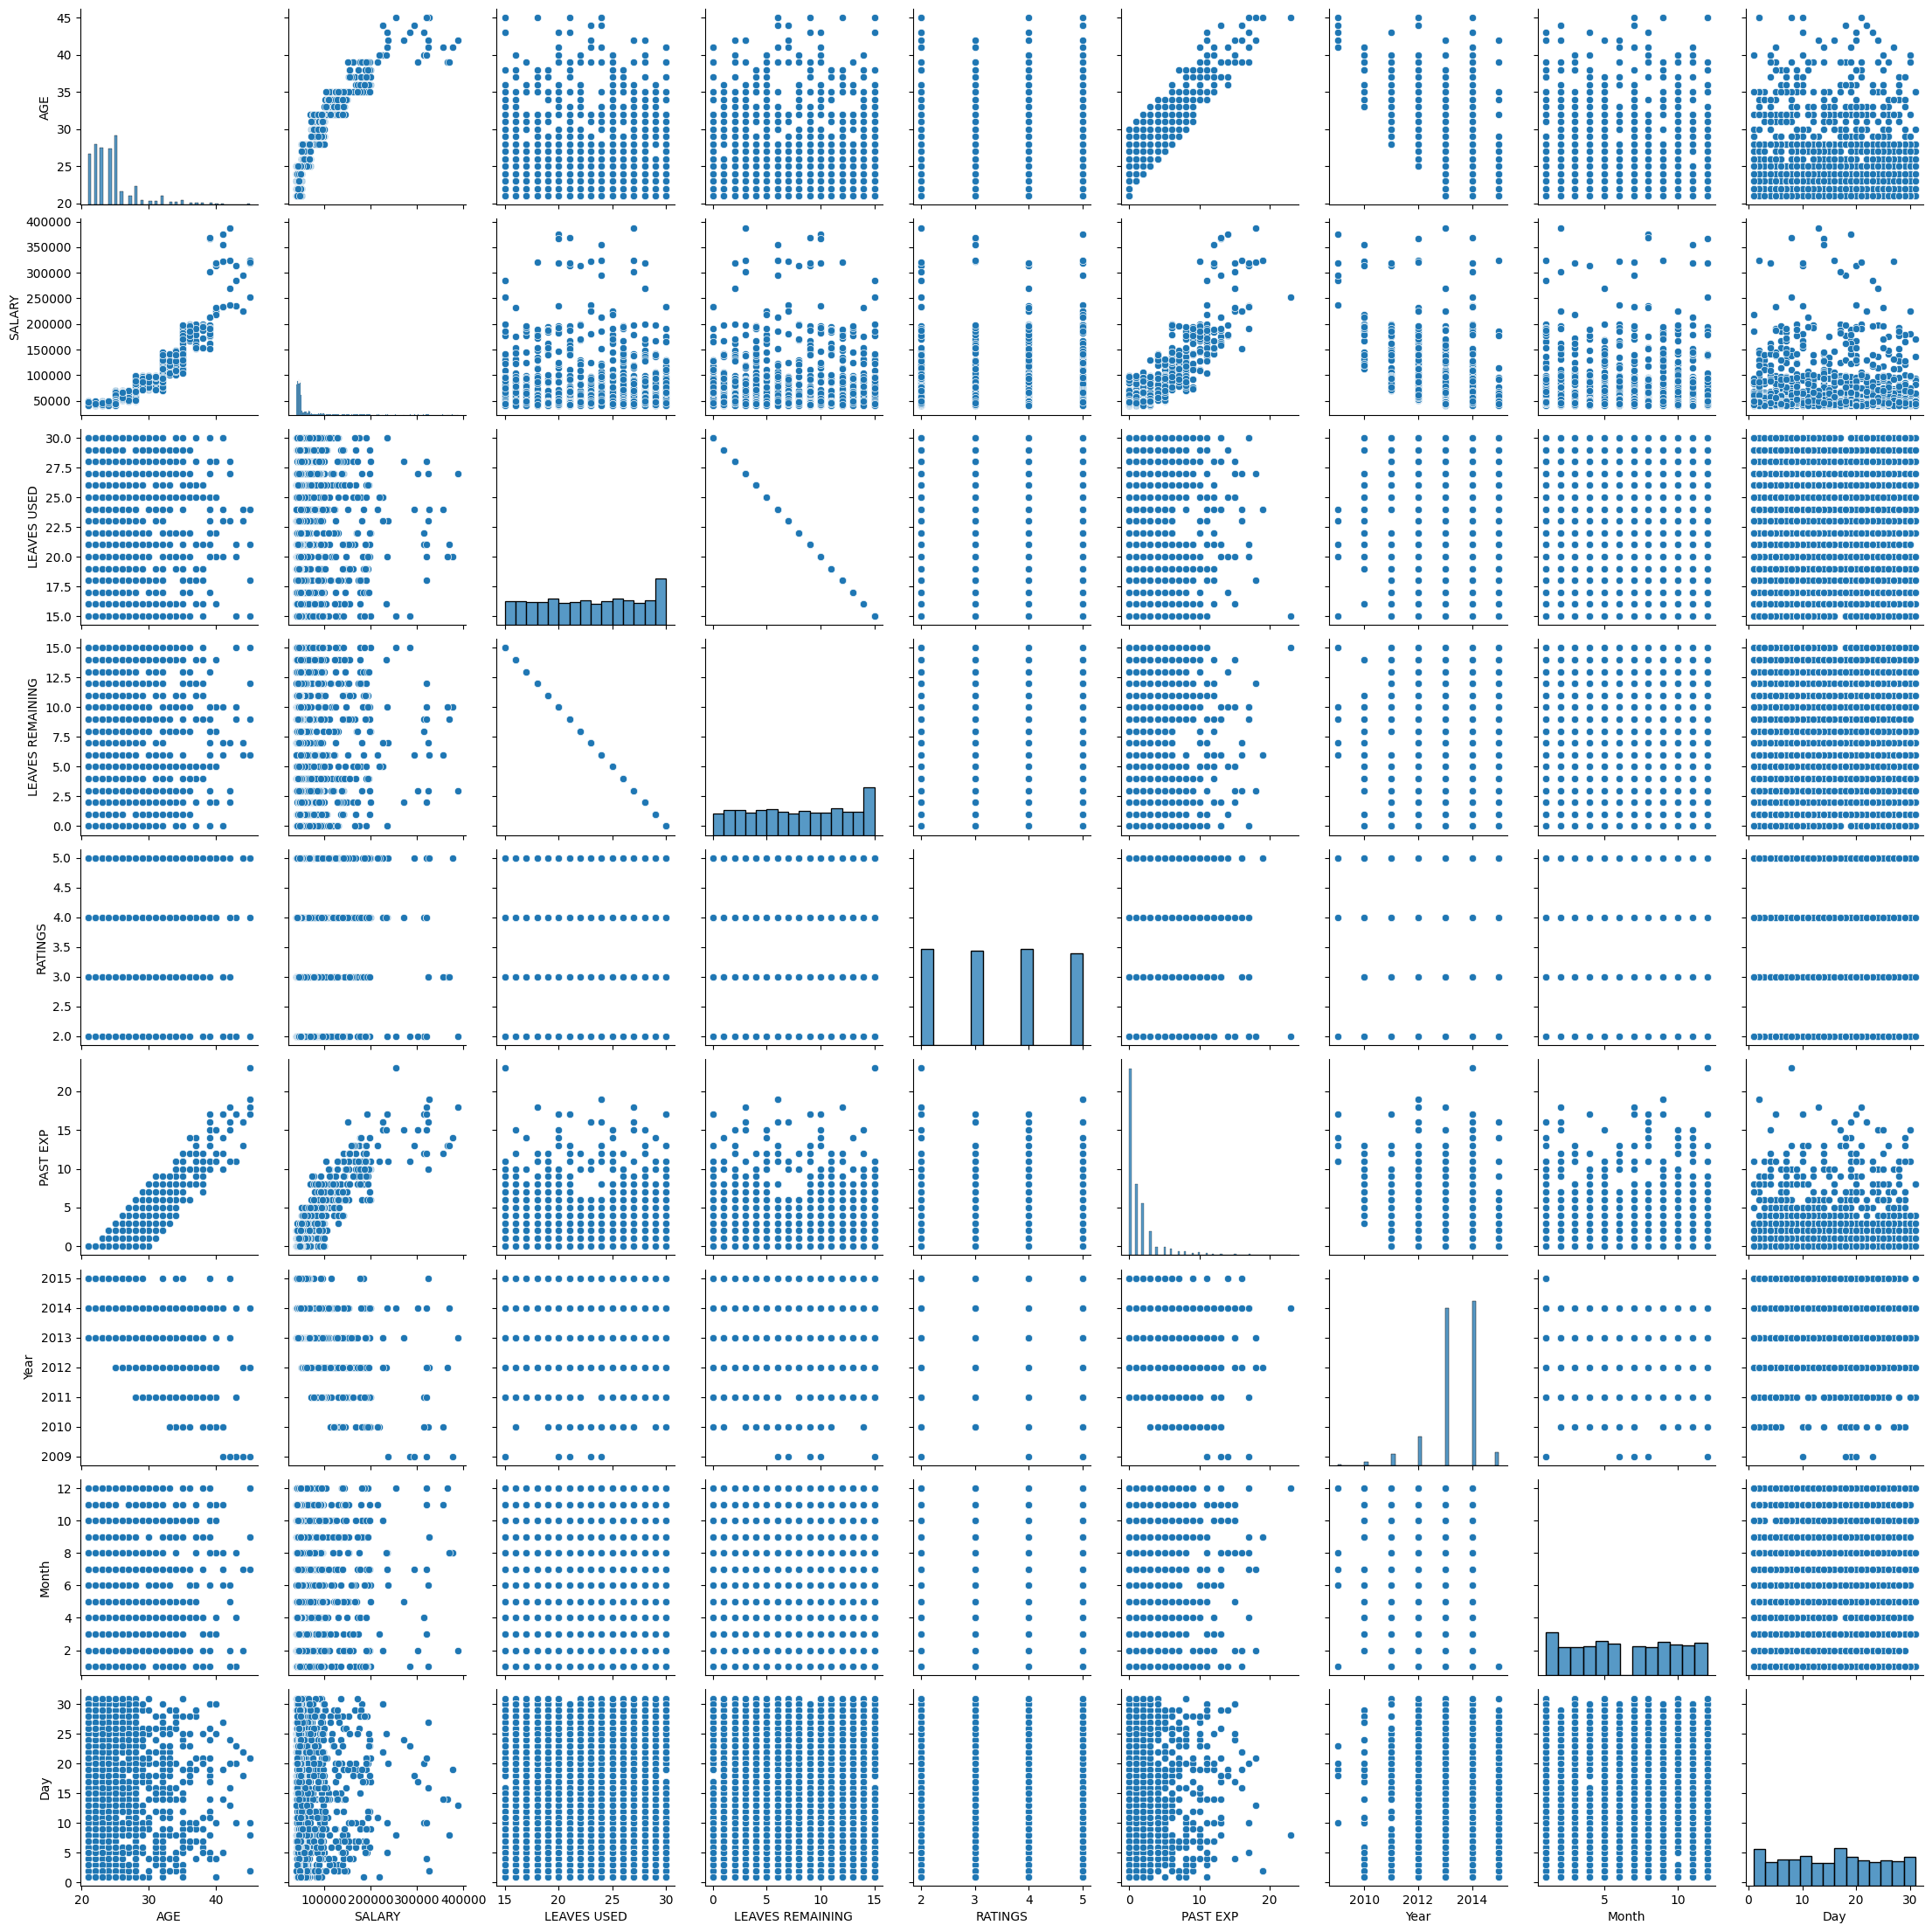

In [32]:
sns.pairplot(df)
plt.show()

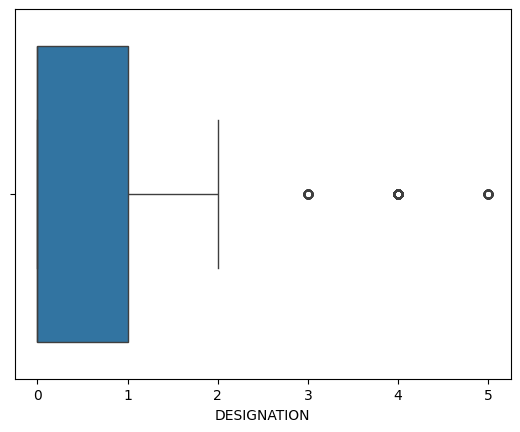

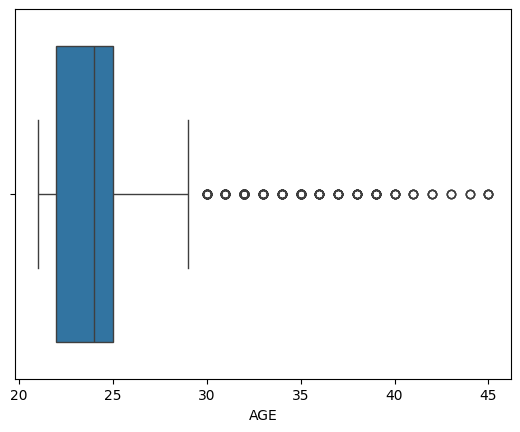

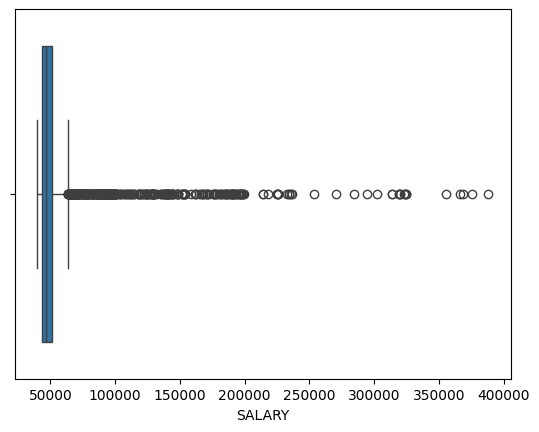

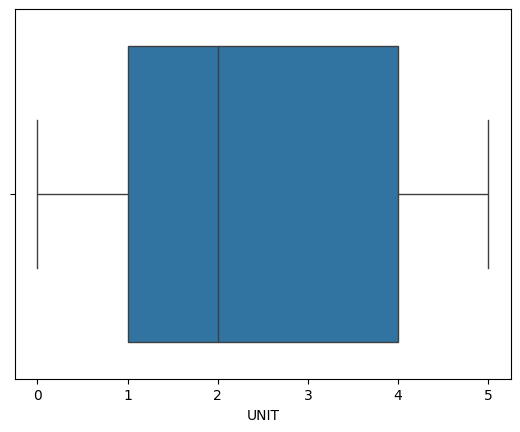

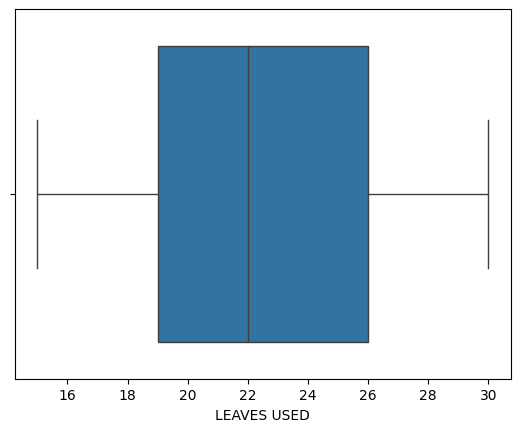

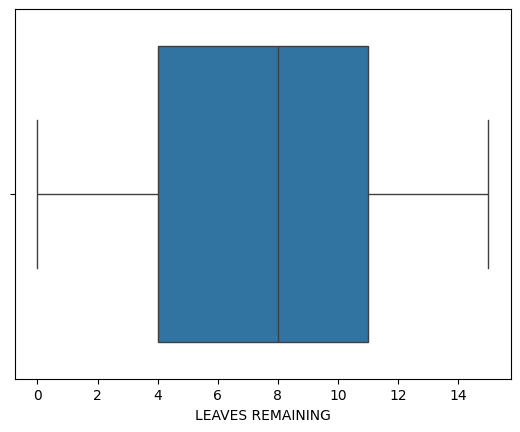

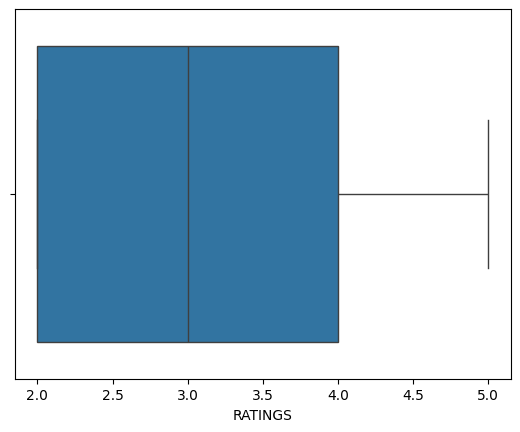

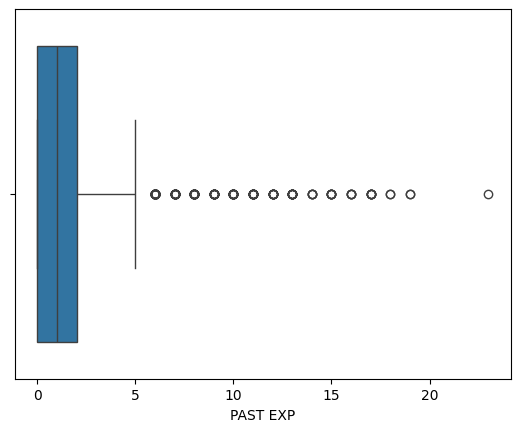

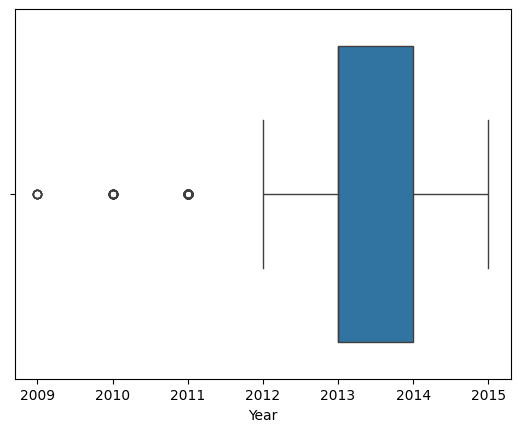

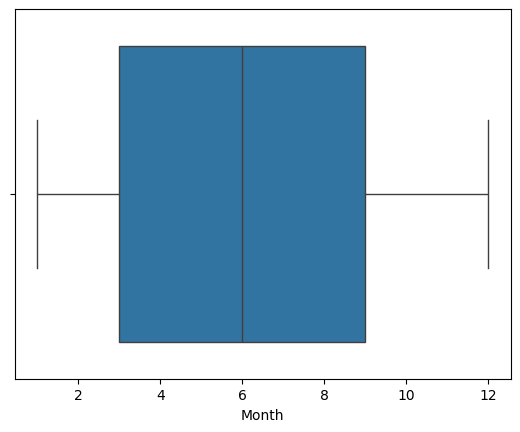

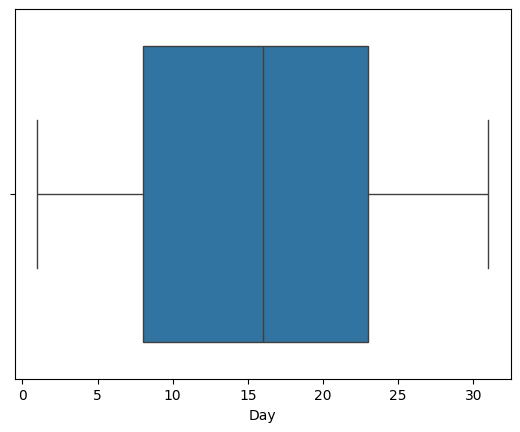

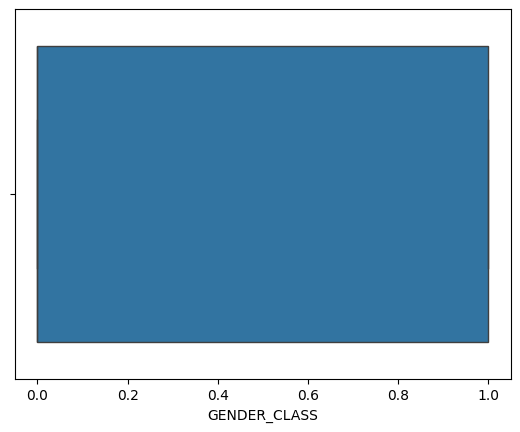

In [33]:
# Box plot is used to find the outliers
for i in df1.columns:
    sns.boxplot(data=df1, x=i)
    plt.show()

In [34]:
# To find the correlation between the features
df1.corr

<bound method DataFrame.corr of       DESIGNATION   AGE  SALARY  UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  \
0               0  21.0   44570     0         24.0               6.0      2.0   
2               0  21.0   40955     0         23.0               7.0      3.0   
3               0  22.0   45550     1         22.0               8.0      3.0   
6               0  22.0   40339     3         19.0              11.0      5.0   
8               4  28.0   63478     4         20.0              10.0      3.0   
...           ...   ...     ...   ...          ...               ...      ...   
2634            5  36.0  185977     2         15.0              15.0      5.0   
2635            0  23.0   45758     1         17.0              13.0      2.0   
2636            0  21.0   47315     5         29.0               1.0      5.0   
2637            0  24.0   45172     5         23.0               7.0      3.0   
2638            0  24.0   49176     3         17.0              13.0      2.0

# Model Preparation

In [35]:
# Loading libraries and classes
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [36]:
# Assigning columns to X & y to use it to train 
X=df1.drop(['SALARY'], axis=1)
y=df1['SALARY']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# To print the no. of rows and columns
print('X Train: ', X_train.shape)
print('X Test: ', X_test.shape)
print('Y Train: ', y_train.shape)
print('Y Test: ', y_test.shape)

X Train:  (2104, 11)
X Test:  (527, 11)
Y Train:  (2104,)
Y Test:  (527,)


In [39]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = lr.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Mean Squared Error:  233192202.256167
Root Mean Squared Error:  15270.632018884058
R2 Score:  0.8136596908575653


In [42]:
# Using Decision Tree Regressor Algo
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
ydtr = dtr.predict(X_test)
mse = mean_squared_error(y_test, ydtr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, ydtr)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Mean Squared Error:  122478374.82163188
Root Mean Squared Error:  11066.994841492964
R2 Score:  0.902129410817714


In [43]:
#Using RandomForest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
mse = mean_squared_error(y_test, rfpred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rfpred)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Mean Squared Error:  49585365.679446705
Root Mean Squared Error:  7041.687701073281
R2 Score:  0.9603770954592269


In [44]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [45]:
mse = mean_squared_error(y_test, svm_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svm_pred)
print("Mean Squared Error: ", mse)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Mean Squared Error:  250071769.28273246
Root Mean Squared Error:  15813.65768197644
R2 Score:  0.8001714879610319


# Model Tuning

from sklearn.model_selection import GridSearchCV
param_grid = {'parameter_name': [values]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


# Final Model Deployment

import joblib
joblib.dump(model, 'salary_prediction.pkl')

### Out of all the models, I can see that Random Forest Regressor has good R2 Score of 95.9%